Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0640 - mae: 0.1404 - val_loss: 0.0371 - val_mae: 0.0910
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0311 - mae: 0.0798 - val_loss: 0.0259 - val_mae: 0.0692
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0240 - mae: 0.0655 - val_loss: 0.0213 - val_mae: 0.0601
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0202 - mae: 0.0574 - val_loss: 0.0186 - val_mae: 0.0538
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0182 - mae: 0.0526 - val_loss: 0.0168 - val_mae: 0.0497
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Detected 77 anomalies out of 10000 samples.


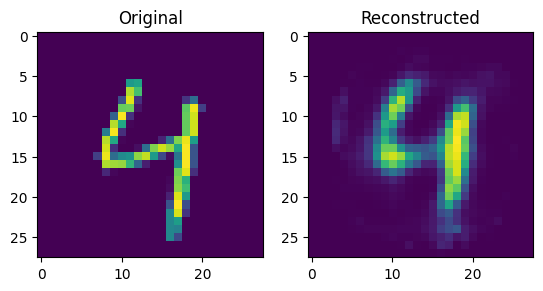

In [3]:
# =====================================================
# EXPERIMENT NO. 4 – Autoencoder for Anomaly Detection
# =====================================================

# --- (a) Import required libraries ---
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.datasets import mnist

# --- (b) Upload / access dataset ---
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0

# --- (c) Encoder: converts input to latent representation ---
input_img = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_img)
latent = Dense(32, activation='relu')(encoded)

# --- (d) Decoder: reconstructs input from latent vector ---
decoded = Dense(64, activation='relu')(latent)
output_img = Dense(784, activation='sigmoid')(decoded)

# --- (e) Compile and train the Autoencoder ---
autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='mse', metrics=['mae'])
autoencoder.fit(x_train, x_train, epochs=5, batch_size=256, validation_data=(x_test, x_test))

# --- Evaluate anomaly detection ---
reconstructed = autoencoder.predict(x_test)
loss = np.mean(np.square(x_test - reconstructed), axis=1)
threshold = np.mean(loss) + 3*np.std(loss)
anomalies = np.where(loss > threshold)[0]
print(f"\nDetected {len(anomalies)} anomalies out of {len(x_test)} samples.")

# --- Show example reconstruction ---
n = np.random.randint(0, len(x_test))
plt.subplot(1,2,1); plt.imshow(x_test[n].reshape(28,28)); plt.title("Original")
plt.subplot(1,2,2); plt.imshow(reconstructed[n].reshape(28,28)); plt.title("Reconstructed")
plt.show()
